# LINEAR REGRESSION ON THE CAR PRICE DATA

In [1]:
import pandas as pd
cp = pd.read_csv(r"C:\Users\TIASHA\Downloads\car_price (1).csv")
pd.options.display.max_columns = None 
pd.options.display.max_rows = None

In [2]:
cp.head(100)

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,gas,std,two,hatchback,rwd,front,94.5,alfa-romero,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,gas,std,four,sedan,fwd,front,99.8,audi,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.00,102,5500,24,30,13950
4,2,164,gas,std,four,sedan,4wd,front,99.4,audi,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.00,115,5500,18,22,17450
5,2,?,gas,std,two,sedan,fwd,front,99.8,audi,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.4,8.50,110,5500,19,25,15250
6,1,158,gas,std,four,sedan,fwd,front,105.8,audi,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.4,8.50,110,5500,19,25,17710
7,1,?,gas,std,four,wagon,fwd,front,105.8,audi,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.4,8.50,110,5500,19,25,18920
8,1,158,gas,turbo,four,sedan,fwd,front,105.8,audi,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.4,8.30,140,5500,17,20,23875
9,0,?,gas,turbo,two,hatchback,4wd,front,99.5,audi,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.4,7.00,160,5500,16,22,?


In [3]:
cp.shape

(205, 26)

In [4]:
cp.isnull().sum()

symboling            0
normalized_losses    0
Fuel_type            0
make                 0
num_of_doors         0
aspiration           0
wheel_base           0
engine_location      0
drive_wheels         0
body_style           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [5]:
cp= cp.drop(['normalized_losses'], axis=1)

In [6]:
cp.shape

(205, 25)

In [7]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   Fuel_type          205 non-null    object 
 2   make               205 non-null    object 
 3   num_of_doors       205 non-null    object 
 4   aspiration         205 non-null    object 
 5   wheel_base         205 non-null    object 
 6   engine_location    205 non-null    object 
 7   drive_wheels       205 non-null    float64
 8   body_style         205 non-null    object 
 9   length             205 non-null    float64
 10  width              205 non-null    float64
 11  height             205 non-null    float64
 12  curb_weight        205 non-null    int64  
 13  engine_type        205 non-null    object 
 14  num_of_cylinders   205 non-null    object 
 15  engine_size        205 non-null    int64  
 16  fuel_system        205 non

In [8]:
cp = cp.astype(str)

In [9]:
#cp.info()

### USING LABELENCODER TO CONVERT OBJECT TYPE ENTRY INTO INT TYPE ENTRY

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cp[cp.select_dtypes(include=['object']).columns]  =  cp[cp.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [11]:
#cp.head()

###  SAMPLING (  divide the data into Train and Test)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
cp_x = cp.iloc[: , 0:24]
cp_y = cp.iloc[: , 24]

# seprated the X and Y

In [14]:
x_train , x_test , y_train , y_test = train_test_split(cp_x , cp_y , train_size = 0.2)

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [16]:
lr.fit(x_train , y_train)

LinearRegression()

In [17]:
predict = lr.predict(x_train)

In [18]:
lr.coef_

array([-2.10947907e+01,  3.84827808e+01,  8.79045599e+00,  6.88158943e+01,
        2.44614946e+00, -3.63470807e+01,  1.72253010e+02, -1.43067381e-01,
       -3.60092836e-01,  2.73916313e+00,  4.57469273e-01, -1.14864768e+00,
       -1.58935974e+00, -1.36852484e+00, -7.84955494e+00,  8.88822246e-02,
       -1.00005882e+01, -1.80137367e-01,  2.85444609e+00,  7.45642217e-01,
        2.00415721e-01, -5.16560799e+00, -7.85527470e+00,  4.96911497e+00])

In [19]:
x_train.columns

Index(['symboling', 'Fuel_type', 'make', 'num_of_doors', 'aspiration',
       'wheel_base', 'engine_location', 'drive_wheels', 'body_style', 'length',
       'width', 'height', 'curb_weight', 'engine_type', 'num_of_cylinders',
       'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio',
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg'],
      dtype='object')

In [20]:
lr.intercept_

181.01785061307226

In [21]:
#RSQUARE
Rsquar=lr.score(x_train , y_train)
Rsquar 

0.8166194704537301

In [22]:
# Adjusted Rsquare

#   1 - [(1- Rsquare) * ( N -) /  ( N -  K  -  1)]

N = x_train.shape[0]
K = x_train.shape[1]
Rsquar=lr.score(x_train , y_train)
ADJRsquar = 1-((1-Rsquar)*(N-1)/(N-K-1))
print("Adjusted Rsquare is     ---- >   "  ,ADJRsquar)

Adjusted Rsquare is     ---- >    0.5415486761343251


In [23]:
train_prediction = lr.predict(x_train)

In [24]:
test_prediction = lr.predict(x_test)

In [25]:
#TRAIN ERROR
error = y_train - train_prediction

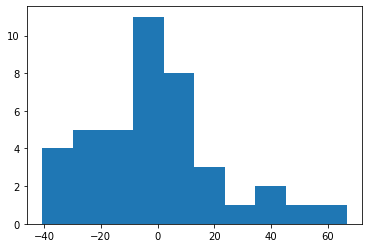

In [26]:
#HISTOGRAM OF TRAIN ERROR
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(error);

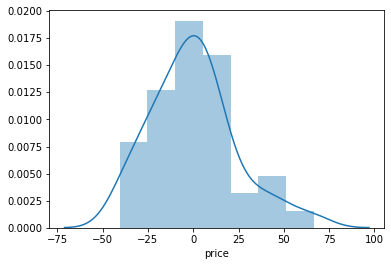

In [27]:
#DISTPLOT OF TRAIN ERROR
sns.distplot(error);

In [28]:
#TEST ERROR
error_test = y_test - test_prediction

In [29]:
error_test.mean()

4.9595908964402495

In [30]:
#MSE
import numpy as np
MSE = np.mean(np.square(error_test))
MSE

5666.373455187755

In [31]:
#RMSE
RMSE = np.sqrt(error_test)
RMSE.mean()

E:\Anaconda\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


6.830517740050441

In [32]:
#MAPE
MAPE = np.mean(np.abs(error_test.mean()/y_test.mean()))
MAPE

0.05158704300223257

In [33]:
#ACCURACY
Accuracy = 100 -MAPE*100
Accuracy

94.84129569977674

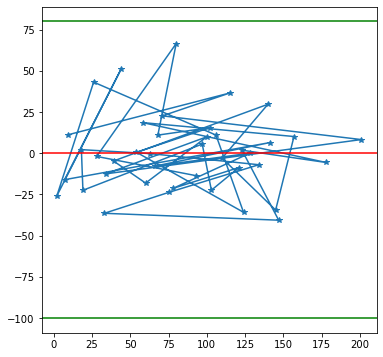

In [34]:
plt.figure(figsize= (6 , 6))

plt.plot(   error, marker  =  "*")
plt.axhline(y  = np.mean(error)  , color = "r")
plt.axhline(y  = 80  , color = "g")
plt.axhline(y  = -100  , color = "g")

In [35]:
pred_actual_train=pd.DataFrame({"Predicted":predict, "Actual":y_train, "Error": error})
pred_actual_train

,Predicted,Actual,Error
93,149.607917,136,-1.360792e+01
28,167.929225,166,-1.929225e+00
80,113.398168,180,6.660183e+01
68,73.986639,85,1.101336e+01
102,21.474765,37,1.552524e+01
54,136.405729,137,5.942707e-01
124,59.822544,24,-3.582254e+01
106,56.975396,68,1.102460e+01
26,97.815135,141,4.318486e+01
2,75.791310,50,-2.579131e+01


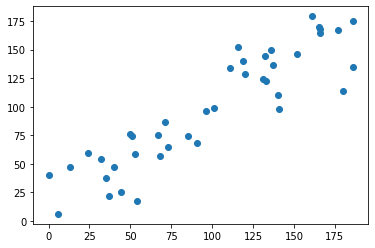

In [36]:
plt.scatter(x = "Actual" , y = "Predicted" , data = pred_actual_train )

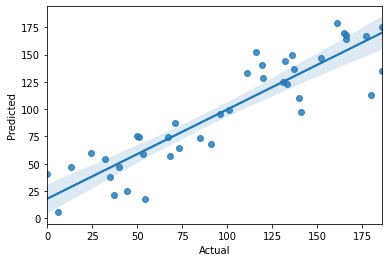

In [37]:
sns.regplot(pred_actual_train.Actual , pred_actual_train.Predicted)